### Problem2: 
* Use the exponential smoothing forecast with alpha=0.75 from previous problem and perform adjusted exponential smoothing on the stock prices to predict the stock price for 04-16-2018
* The given trend parameters(beta) are 0.15,0.25,0.45,0.85
* Calculate the Mean Squared Error(MSE) for each forecast

### KEY CONCEPTS
* The idea behind Trend-Adjusted Exponential Smoothing for making forecasts consists of using an exponential smoothing form of forecasting, but with a correction to account for a trend 
* Otherwise, when there is a trend and it is not accounted for with exponential smoothing, its forecasts tend to lag behind
* The trend-adjusted exponential smoothing forecast costs of two parts: 
   * forecast
   * exponentially smoothed trend



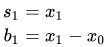

 \begin{aligned}s_{t}&=\alpha x_{t}+(1-\alpha )(s_{t-1}+b_{t-1})\\b_{t}&=\beta (s_{t}-s_{t-1})+(1-\beta )b_{t-1}\\\end{aligned}

* where α is the data smoothing factor, 0 < α < 1, and β is the trend smoothing factor, 0 < β < 1.

* The Trend-Adjusted Exponential Smoothing method of forecasting is a more sophisticated forecasting method, used commonly when there is a trend component in the time series. 

### STEP1: 
* Import all the required packages
* Upload the Honeywell csv file which has the dataset to be worked upon
* Read the csv file and store it in a Data Frame
* In the given dataset, we have the prices of stock from 2017-10-16 to 2018-04-13
* We need to forecast the stock price for 2018-04-16

In [25]:
#data extraction


#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import matplotlib.dates as mdates


my_data=pd.read_csv('honeywell1.csv',delimiter=',')
my_data.head()
my_data['Date']=pd.to_datetime(my_data['Date'])
my_data.head()



,Period,Date,Close,Volume
0,1,2017-10-16,143.750000,2001900.0
1,2,2017-10-17,143.429993,2435600.0
2,3,2017-10-18,143.440002,1734100.0
3,4,2017-10-19,143.619995,2623100.0
4,5,2017-10-20,145.350006,3369500.0


In [26]:
def exponential_smoothing(series, alpha):
    result = np.array([])
    result=np.append(result,series[0]) # first value is same as series
    
    for n in range(1, len(series)):
        values=(alpha * series[n-1] + (1 - alpha) * result[n-1])
        result=np.append(result,values)
    return result
      
series=my_data['Close']
smoothing_number=exponential_smoothing(series,0.75)
estimated_values=my_data.copy() 
estimated_values['SES0.75'] = smoothing_number
estimated_values.head()

,Period,Date,Close,Volume,SES0.75
0,1,2017-10-16,143.750000,2001900.0,143.750000
1,2,2017-10-17,143.429993,2435600.0,143.750000
2,3,2017-10-18,143.440002,1734100.0,143.509995
3,4,2017-10-19,143.619995,2623100.0,143.457500
4,5,2017-10-20,145.350006,3369500.0,143.579371


### STEP 2: Performing adjusted exponential smoothing
* Performing adjusted exponential smoothing, with beta values 0.15,0.25,0.45,0.85 to forecast the stock price for 04-16-2018
* The first step is to calculate the exponentially smoothed trend. For this, the first value is equal to 0. From the second value we use the formula mentioned above


In [34]:
def adj_exp_smoothing(data, beta):
    output = np.array([])
    output=np.append(output,0) # first value is same as series
    
    for n in range(1, len(data)):
        values=(beta * (data[n]-data[n-1]) + (1 - beta) * output[n-1])
        output=np.append(output,values)
    return output

data=estimated_values['SES0.75']
smoothing_number1=adj_exp_smoothing(data,0.15)
smoothing_number2=adj_exp_smoothing(data,0.25)
smoothing_number3=adj_exp_smoothing(data,0.45)
smoothing_number4=adj_exp_smoothing(data,0.85)

adj_estimated_values=estimated_values.copy() 
adj_estimated_values['beta0.15'] = smoothing_number1
adj_estimated_values['beta0.25'] = smoothing_number2
adj_estimated_values['beta0.45'] = smoothing_number3
adj_estimated_values['beta0.85'] = smoothing_number4

adj_estimated_values.head()

,Period,Date,Close,Volume,SES0.75,beta0.15,beta0.25,beta0.45,beta0.85
0,1,2017-10-16,143.750000,2001900.0,143.750000,0.000000,0.000000,0.000000,0.000000
1,2,2017-10-17,143.429993,2435600.0,143.750000,0.000000,0.000000,0.000000,0.000000
2,3,2017-10-18,143.440002,1734100.0,143.509995,-0.036001,-0.060001,-0.108002,-0.204004
3,4,2017-10-19,143.619995,2623100.0,143.457500,-0.038475,-0.058125,-0.083024,-0.075221
4,5,2017-10-20,145.350006,3369500.0,143.579371,-0.014423,-0.013126,0.009179,0.092307


#### The next step is to calculate the adjusted values. We calculate this by taking the difference of forecast value and calculated smoothed trend values

In [49]:
def adjusted_exponential_smoothing(a,b):
    output = np.array([]) 
    for n in range(len(adj_estimated_values)):
        values=a[n]+b[n]
        output=np.append(output,values)
    return output
adjust_values1=adjusted_exponential_smoothing(adj_estimated_values['SES0.75'],adj_estimated_values['beta0.15'])
adjust_values2=adjusted_exponential_smoothing(adj_estimated_values['SES0.75'],adj_estimated_values['beta0.25'])      
adjust_values3=adjusted_exponential_smoothing(adj_estimated_values['SES0.75'],adj_estimated_values['beta0.45'])
adjust_values4=adjusted_exponential_smoothing(adj_estimated_values['SES0.75'],adj_estimated_values['beta0.85'])


adj_estimated_values_new = adj_estimated_values.copy() 


adj_estimated_values_new['adj_exp_smoothing0.15'] = adjust_values1
adj_estimated_values_new['adj_exp_smoothing0.25'] = adjust_values2
adj_estimated_values_new['adj_exp_smoothing0.45'] = adjust_values3
adj_estimated_values_new['adj_exp_smoothing0.85'] = adjust_values4

adj_estimated_values_new.tail()

,Period,Date,Close,Volume,SES0.75,beta0.15,beta0.25,beta0.45,beta0.85,adj_exp_smoothing0.15,adj_exp_smoothing0.25,adj_exp_smoothing0.45,adj_exp_smoothing0.85
120,121,2018-04-10,145.630005,2880400.0,143.008280,-0.391284,-0.420474,-0.599751,-0.733784,142.616996,142.587806,142.408529,142.274496
121,122,2018-04-11,144.279999,1953100.0,144.974574,-0.037648,0.176218,0.554969,1.561282,144.936926,145.150792,145.529543,146.535856
122,123,2018-04-12,146.470001,2327600.0,144.453643,-0.110140,0.001931,0.070814,-0.208599,144.343503,144.455574,144.524457,144.245044
123,124,2018-04-13,146.119995,1588500.0,145.965911,0.133221,0.379515,0.719469,1.254139,146.099133,146.345427,146.685380,147.220050
124,125,2018-04-16,NaN,NaN,146.081474,0.130572,0.313527,0.447711,0.286349,146.212047,146.395001,146.529185,146.367823


### Result: As we can see, for 04/16/2018 the forecasted stock price is as follows:
#### beta(0.15)=146.21
#### beta(0.25)= 146.39
#### beta(0.45)= 146.59
#### betaa(0.85)= 146.36

### STEP 3: Calculating Mean Squared Error
* For calculating the MSE we need to find the error which is the difference between observed value and forecasted value
* The next step is to take the absolute values of the error
* Now, we need to square the absolute error values and take the average of the values. The resulting value is MSE


In [55]:
from sklearn.metrics import mean_squared_error

mse_result=np.array([])
y_true =adj_estimated_values_new.loc[0:123, ['SES0.75']]
y_pred1 =adj_estimated_values_new.loc[0:123, ['adj_exp_smoothing0.15']]
y_pred2 =adj_estimated_values_new.loc[0:123, ['adj_exp_smoothing0.25']]
y_pred3 =adj_estimated_values_new.loc[0:123, ['adj_exp_smoothing0.45']]
y_pred4 = adj_estimated_values_new.loc[0:123, ['adj_exp_smoothing0.85']]

a=mean_squared_error(y_true, y_pred1)
b=mean_squared_error(y_true, y_pred2)
c=mean_squared_error(y_true, y_pred3)
d=mean_squared_error(y_true, y_pred4)

mse_list=[a,b,c,d]
    
mse_list   


[0.16007935283965696,
 0.3016496818870544,
 0.5972456631604051,
 1.3009862154523528]

### Result: The following are respective MSE values for different smoothing parameters
#### beta(0.15)=0.16
#### beta0.35)= 0.30
#### beta(0.55)= 0.59
#### beta(0.75)= 1.30

### From these obtained MSE values, we can say that when beta value is 0.15 we get the least MSE value. Hence beta=0.15 gives the accurate forecast value of stock price for 04-16-2018
